In [218]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('result_final.csv')

In [171]:
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags
0,NaN,Free To Play Games,No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,710549.0,3236027.0,win,Free To Play,Mixed,2544830.0,Survival/Shooter/Battle Royale/Multiplayer/FPS...
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,"64,39zł",Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...
2,NaN,Free To Play Games,No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,9146.0,113243.0,win,Free To Play,Mostly Positive,36847.0,FPS/Free to Play/Hero Shooter/Action/Team-Base...
3,NaN,Animation & Modeling,Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,94.0,121.0,"win,mac",NaN,Very Positive,220.0,Animation & Modeling/Game Development/3D/Desig...
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,"169,99zł",Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...


In [172]:
df['price'] = (df['price'].str.replace('zł', '', regex=False)).str.replace(',', '.', regex=False)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df['version'] = df.groupby('name')['price'].rank(method='first', ascending=True).astype(int)

In [173]:
df = df.dropna(subset=['languages']) # что нет ни одной игры не на английском
df['number_of_langs'] = [(len(i.split(','))) for _, i in df['languages'].items()]
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags,version,number_of_langs
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,64.39,Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...,1,1
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,169.99,Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...,1,11
6,12+,Indie Games,Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,79373.0,236614.0,"win,mac,linux",53.99,Overwhelmingly Positive,750233.0,Farming Sim/Pixel Graphics/Multiplayer/Life Si...,1,12
7,NaN,Racing Games/Assetto Corsa Official Franchise,No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,14464.0,19780.0,win,84.84,Very Positive,116109.0,Racing/Automobile Sim/Simulation/Driving/Multi...,1,4
9,3+,Sports Games/EA Sports Franchise,No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,329.0,1363.0,win,69.90,Mixed,1718.0,Sports/RPG/Co-op/Local Co-Op/Golf/Local Multip...,1,1


In [174]:
# Генерируем категории как признаки
df['category'] = df['category'].fillna('Other')

In [175]:
df['category'] = df['category'].apply(lambda x: x.split('/')).tolist()

In [176]:
df['category']

1                                      [Simulation Games]
4                                          [Action Games]
6                                           [Indie Games]
7        [Racing Games, Assetto Corsa Official Franchise]
9                     [Sports Games, EA Sports Franchise]
                              ...                        
1206                                   [Simulation Games]
1208      [Action Games, Stormgate, Downloadable Content]
1210    [Action Games, Eugen Systems' Wargame Franchis...
1211                                        [Indie Games]
1214      [Action Games, Stormgate, Downloadable Content]
Name: category, Length: 792, dtype: object

In [177]:
list_of_categories = df['category'].values

cat_concated = []
for tag in list_of_categories:
    cat_concated.extend(tag)

cat_counts = Counter(cat_concated, )

cat_counts

Counter({'Action Games': 189,
         'Indie Games': 140,
         'Simulation Games': 106,
         'Downloadable Content': 101,
         'Adventure Games': 82,
         'Casual Games': 66,
         'Strategy Games': 58,
         'RPG Games': 45,
         'Hack and Slash Fury': 45,
         'Racing Games': 35,
         'Sports Games': 20,
         'Free To Play Games': 17,
         'PlayWay S.A. Franchise': 8,
         'Early Access Games': 8,
         'EA Sports Franchise': 7,
         'SC Jogos Franchise': 6,
         'Utilities': 5,
         'Curve Games Franchise': 4,
         'Game Development': 4,
         'Nicalis Franchise': 4,
         'WB Games Franchise': 4,
         'Animation & Modeling': 4,
         'Assetto Corsa Official Franchise': 3,
         'Xbox Game Studios Franchise': 3,
         'Age of Empires Franchise Franchise': 3,
         'Gotcha Gotcha Games Franchise': 3,
         'Snail Games USA Franchise': 3,
         'Audio Production': 3,
         'Assemble Entert

In [178]:
filtered_cats = [cat for cat, count in cat_counts.items() if count >= 10]

In [179]:
filtered_cats

['Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Free To Play Games',
 'Hack and Slash Fury']

In [180]:
df[filtered_cats] = 0

In [181]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Indie Games,Racing Games,Sports Games,Strategy Games,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
6,12+,[Indie Games],Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0,0,0,0
7,NaN,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0,0,0,0
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,NaN,[Simulation Games],No,NaN,May 2025,Tim Lewis,NaN,English,No,Sorter (Early Access),...,0,0,0,0,0,0,0,0,0,0
1208,NaN,"[Action Games, Stormgate, Downloadable Content]",No,NaN,"30 Jul, 2024",Frost Giant Studios,NaN,"English, French, German, Korean, Portuguese - ...",No,Stormgate: Ultimate Early Access Pack,...,0,0,0,0,0,0,0,0,0,0
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,0,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,0,0,0,0,0,0,0,0,0,0


In [182]:
df.columns

Index(['age_rating', 'category', 'cross_platform', 'current_players', 'date',
       'developer', 'file_size', 'languages', 'multiplayer', 'name',
       'peak_24h', 'peak_all_time', 'platforms', 'price', 'rate',
       'reviews_numbers', 'tags', 'version', 'number_of_langs',
       'Simulation Games', 'Action Games', 'Indie Games', 'Racing Games',
       'Sports Games', 'Strategy Games', 'Adventure Games',
       'Downloadable Content', 'Casual Games', 'RPG Games',
       'Free To Play Games', 'Hack and Slash Fury'],
      dtype='object')

In [183]:
def process_row(row):
    cat_list = row['category']
    for cat in cat_list:
        if cat in row:
            row[cat] = 1
    return row

df = df.apply(process_row, axis=1)

In [184]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Indie Games,Racing Games,Sports Games,Strategy Games,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
6,12+,[Indie Games],Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,1,0,0,0,0,0,0,0,0,0
7,NaN,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,1,0,0,0,0,0,0,0,0
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,NaN,[Simulation Games],No,NaN,May 2025,Tim Lewis,NaN,English,No,Sorter (Early Access),...,0,0,0,0,0,0,0,0,0,0
1208,NaN,"[Action Games, Stormgate, Downloadable Content]",No,NaN,"30 Jul, 2024",Frost Giant Studios,NaN,"English, French, German, Korean, Portuguese - ...",No,Stormgate: Ultimate Early Access Pack,...,0,0,0,0,0,1,0,0,0,0
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,1,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,1,0,0,0,0,0,0,0,0,0


In [185]:
big_company_flag = pd.read_csv('top_popular_compaines')
tag_based_clustering = pd.read_csv('tag_based_clustering')

In [201]:
df['big_developer'] = [i in big_company_flag['Company'].tolist() for _, i in df['developer'].items()]

df['big_developer'] = df['big_developer'].astype(float)

In [203]:
df[df['number_of_langs'] > 100]
df_fixed = df[df['number_of_langs'] < 40]
df_fixed = df_fixed[df_fixed['price'] != 0]
df_fixed = df_fixed[df_fixed['reviews_numbers'] > 70]
df_fixed['age_rating'] = df_fixed['age_rating'].fillna('Not specified')
df_fixed['date'] = pd.to_datetime(df_fixed['date'])
df_fixed['days_since_realease'] = np.abs(df_fixed['date'] - pd.Timestamp.today()).dt.days

In [204]:
df_fixed.isna().sum(axis=0)[df_fixed.isna().sum(axis=0) != 0]

current_players    179
file_size          406
peak_24h           179
peak_all_time      179
dtype: int64

Исходя из предварительного анализа признаки такие как количество игроков, пико за 24 часа незначимы.
Однако пик за все время значим. Посмотрим среднюю цену для игр у которых отсутствует этот параметр, и для остальных игр.

In [205]:
print(f"Цена для игр у которых присутствует показатель пиковое число игроков {df_fixed[~df_fixed['peak_all_time'].isna()]['price'].mean()}")
print(f"Цена для игр у которых отсутствует показатель пиковое число игроков {df_fixed[df_fixed['peak_all_time'].isna()]['price'].mean()}")

Цена для игр у которых присутствует показатель пиковое число игроков 117.11453744493392
Цена для игр у которых отсутствует показатель пиковое число игроков 60.7435754189944


Более внимательно посмотрим на распределение этого параметра

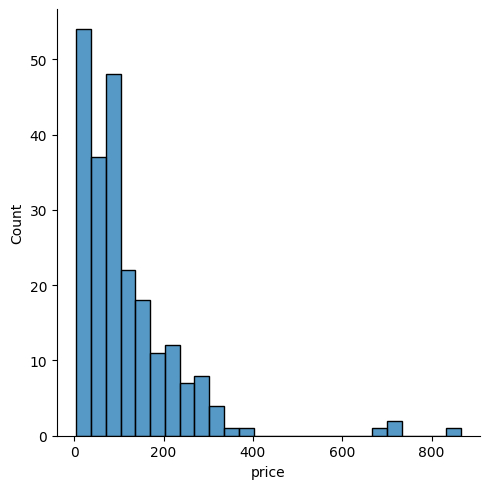

In [206]:
sns.displot(data=df_fixed[~df_fixed['peak_all_time'].isna()], x='price')

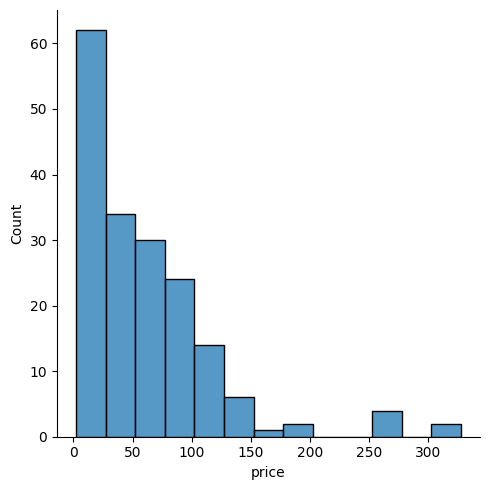

In [207]:
sns.displot(data=df_fixed[df_fixed['peak_all_time'].isna()], x='price')

Видно что распределение в целом похожее, но просто немного сдвинуто влево, явно имеет смысл добавить признак 'отсутсвие пикового онлайна'.

In [216]:
df_fixed['no_peak'] = df_fixed['peak_all_time'].isna().astype(float)


In [209]:
df_fixed['peak_all_time'].fillna(0, inplace = True)

/var/folders/gc/bympp97d7gb3r9135fkmc7w80000gn/T/ipykernel_99480/3557151054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fixed['peak_all_time'].fillna(0, inplace = True)


In [210]:
df_fixed['lg_price'] = np.log(df_fixed['price'])

In [211]:
base_features = ['peak_all_time', 'number_of_langs', 'days_since_realease', 'big_developer', 'no_peak']

In [212]:
filtered_cats

['Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Free To Play Games',
 'Hack and Slash Fury']

In [213]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,False,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,False,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,False,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,False,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,False,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,True,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,True,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,True,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,True,3.804438


In [215]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,False,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,False,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,False,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,False,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,False,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,True,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,True,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,True,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,True,3.804438


In [217]:
X = df_fixed[base_features + filtered_cats]
y = df_fixed['lg_price']

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               lg_price   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              320.4
Date:                Thu, 08 May 2025   Prob (F-statistic):                   1.31e-204
Time:                        00:40:38   Log-Likelihood:                         -644.89
No. Observations:                 406   AIC:                                      1318.
Df Residuals:                     392   BIC:                                      1374.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


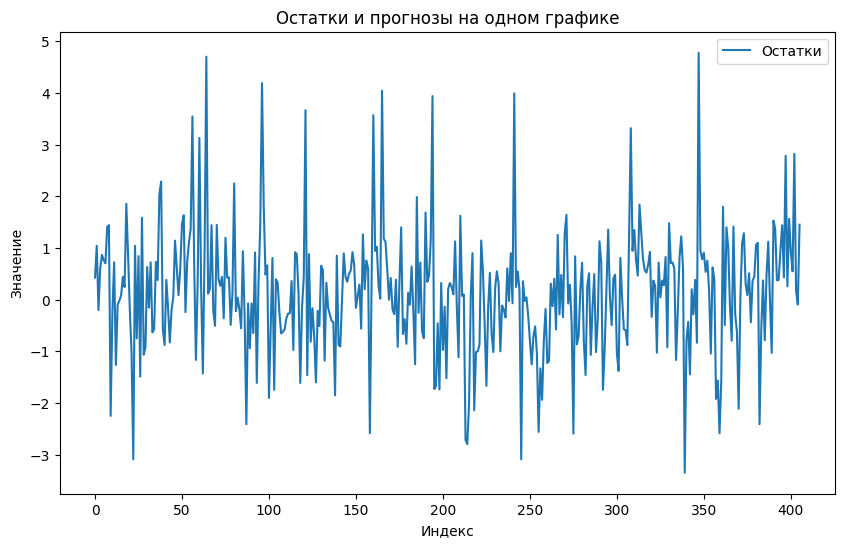

In [220]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(df_fixed['lg_price'])), y = result.resid, label='Остатки')

plt.legend()
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Остатки и прогнозы на одном графике')
plt.show()

In [221]:
df_fixed['pred'] = result.predict()

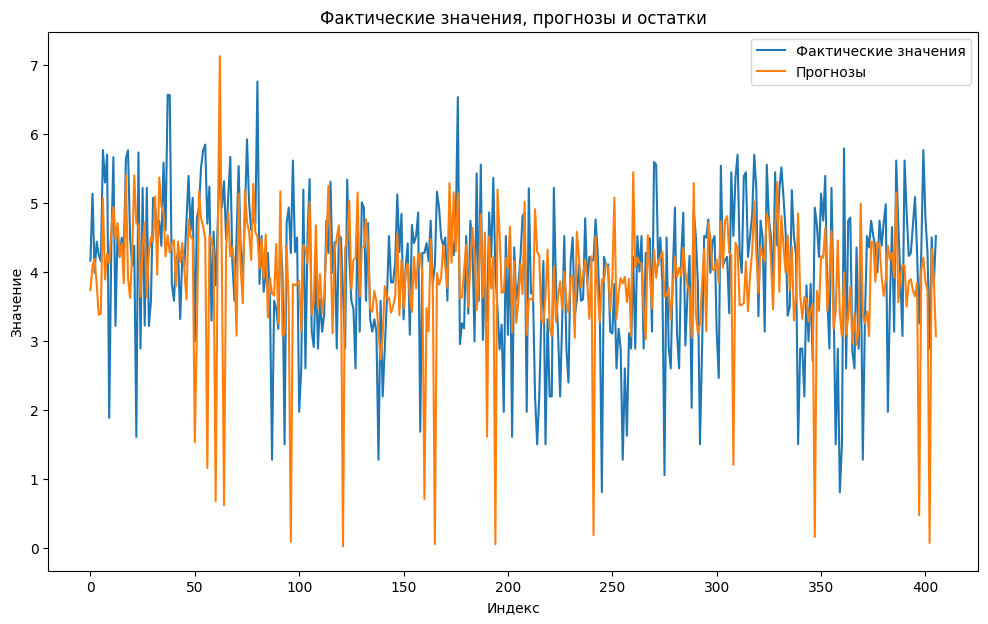

In [222]:
plt.figure(figsize=(12, 7))

x = range(len(df_fixed['lg_price']))

sns.lineplot(x=x, y=df_fixed['lg_price'], label='Фактические значения')

sns.lineplot(x=x, y=df_fixed['pred'], label='Прогнозы')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Фактические значения, прогнозы и остатки')
plt.legend()
plt.show()

In [223]:
df_final = df_fixed.merge(tag_based_clustering, how = 'left', left_on = 'name', right_on = 'game')

df_final.shape

(406, 39)

In [224]:
cluster_ohe = pd.get_dummies(df_final['cluster_name'])
df_final = pd.concat([df_final, cluster_ohe], axis=1)

In [225]:
ohe_cols = df_final.columns[-10:]

df_final[ohe_cols] = df_final[ohe_cols].astype(float)

In [227]:
X = df_final[base_features + filtered_cats + ohe_cols.tolist()]
y = df_final['lg_price']

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               lg_price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              204.7
Date:                Thu, 08 May 2025   Prob (F-statistic):                   1.59e-201
Time:                        00:47:07   Log-Likelihood:                         -622.99
No. Observations:                 406   AIC:                                      1294.
Df Residuals:                     382   BIC:                                      1390.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                                                                               coef    std err          

In [228]:
import pandas as pd
coef_table = pd.DataFrame({
    'coef': result.params,
    'p-value': result.pvalues
})
print(coef_table)


                                                            coef       p-value
peak_all_time                                       2.328245e-06  8.414428e-04
number_of_langs                                     4.660105e-02  3.647568e-08
days_since_realease                                -4.990890e-05  1.722848e-01
big_developer                                       5.290005e-01  7.210860e-02
no_peak                                             5.872813e-16  2.720560e-05
Simulation Games                                    2.960142e+00  6.956611e-32
Action Games                                        2.619248e+00  6.885282e-29
Indie Games                                         2.267964e+00  8.898931e-21
Racing Games                                        2.922193e+00  1.200726e-17
Sports Games                                        2.604418e+00  1.438758e-10
Strategy Games                                      3.090824e+00  3.419195e-28
Adventure Games                                     